In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
import pandas as pd
from scipy.optimize import curve_fit

In [ ]:
N=100
rng=0.5*(2*np.random.random(N)-1) #PARA QUE QUEDEN LOS VALORES ENTRE -1 Y 1

In [ ]:
b=2
x=np.linspace(0,10,N)
y=2.1*x + b + rng

In [ ]:
def fun(x,a, b):
  return a*x + b

params_fit=curve_fit(fun,x,y)

In [ ]:
x_=np.linspace(min(x), max(x), 1000)

y_fit=fun(x_, *params_fit[0])
params_fit[0]

array([2.09392236, 1.97446797])

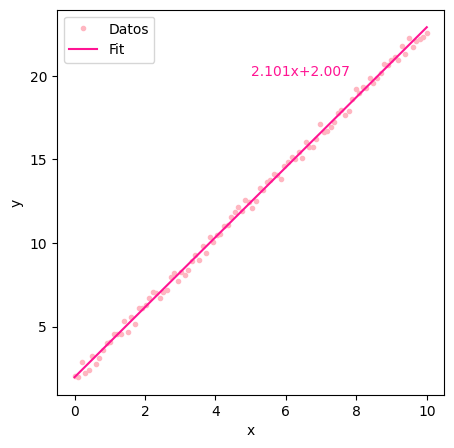

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(x,y,'.' ,color='lightpink', label='Datos')
plt.plot(x_,y_fit, color='deeppink', label='Fit')
plt.text(5, 20, '2.101x+2.007',color='deeppink' )
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [ ]:
file='https://docs.google.com/spreadsheets/d/e/2PACX-1vT1on46nfXC-sPxOXOPO-OXCDIFOdmJWhn_WLEMFDX8REAmfrkT3XwFNuaYxk4gz2FE1KEJo2oHrUyG/pub?output=csv'
df=pd.read_csv(file, sep=';', decimal='.')
df=df.rename(columns={'Tiempo (ms)': 'Tiempo[ms]', 'Ángulo 1,': 'AnguloDeg'})
df.AnguloDeg= df.AnguloDeg.str.replace(',','.').astype(float)
df['AnguloRad']=np.deg2rad(df.AnguloDeg)

In [ ]:
#Creo estas nuevas dos columnas para gráficar el tiempo en segundos y elángulo en radianes centrado ene cero
df['Tiempo[seg]']=df['Tiempo[ms]'].apply(lambda x: x/1000)
df['Angulocentrado']=df['AnguloRad'].apply(lambda x: x-np.mean(df['AnguloRad']))

,Tiempo[ms],AnguloDeg,AnguloRad,Tiempo[seg],Angulocentrado
0,9,59.289612,1.034799,0.009,-0.596384
1,42,59.982327,1.046889,0.042,-0.584294
2,75,61.237453,1.068795,0.075,-0.562388
3,108,63.492477,1.108153,0.108,-0.523031
4,142,65.388771,1.141249,0.142,-0.489934
...,...,...,...,...,...
2842,94709,94.937576,1.656973,94.709,0.025790
2843,94743,96.479851,1.683891,94.743,0.052708
2844,94776,97.940689,1.709387,94.776,0.078204
2845,94809,99.318092,1.733428,94.809,0.102244


Para realizar el fit de esta función, la ecuación que se ajusta a los datos es:
\begin{equation}
f(t)=Ae^{-\alpha t } \sin(\omega t + \phi)
\end{equation}

In [ ]:
x=df['Tiempo[seg]']
y=df['Angulocentrado']

def oscilador_amortiguado(x, A, B, C, D):
    return A * np.exp(-B * x) * np.cos(C * x + D)
  

params_fit=curve_fit(oscilador_amortiguado,x,y)

x_=np.linspace(min(x), max(x), 1000)
y_fit=oscilador_amortiguado(x_, *params_fit[0])

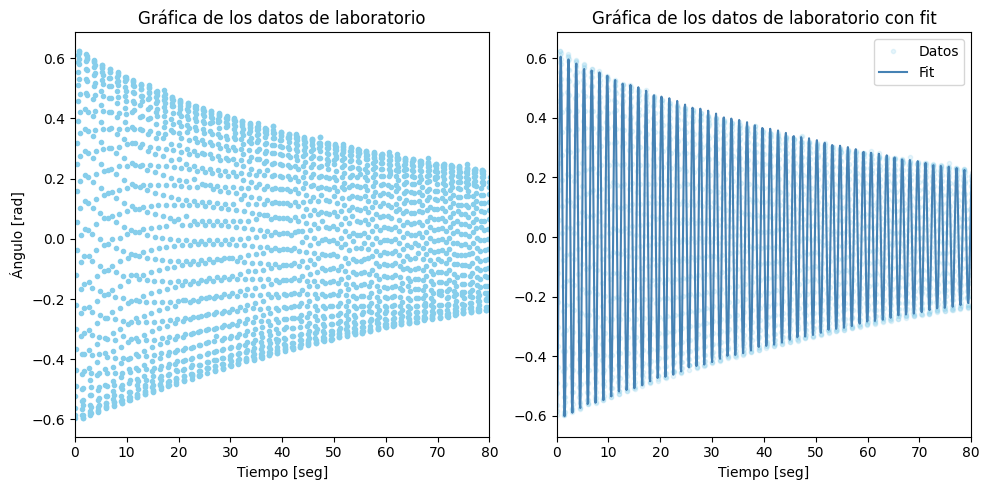

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))

axs[0].plot(df['Tiempo[seg]'],df['Angulocentrado'], '.', color='skyblue')
axs[0].set_title('Gráfica de los datos de laboratorio')
axs[0].set_xlabel('Tiempo [seg]')
axs[0].set_ylabel('Ángulo [rad]')
axs[0].set_xlim(0,80)

axs[1].plot(x,y,'.' ,color='skyblue', alpha=0.2, label='Datos')
axs[1].plot(x_,y_fit, color='steelblue', label='Fit')
axs[1].set_title('Gráfica de los datos de laboratorio con fit')
axs[1].set_xlabel('Tiempo [seg]')
axs[1].set_xlim(0,80)

plt.tight_layout()
plt.legend()